In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys
import os
import json
import torch
import yaml
import numpy as np
import cv2
import copy
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.utils.eval_utils import eval_setup

In [15]:
os.chdir('/workspace/plane-gs')
MODEL_PATH = "/workspace/plane-gs/outputs/jackal_training_data_0/plane-gs/2024-03-01_112106"

In [16]:
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, checkpoint_path, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )

Warning: load_3D_points set to true but no point cloud found. splatfacto will use random point cloud initialization.

[11:44:53] Caching / undistorting train images                                            ]8;id=660170;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=504945;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#182\182]8;;\

Output()

[11:44:55] Caching / undistorting eval images                                             ]8;id=588160;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py\full_images_datamanager.py]8;;\:]8;id=411731;file:///home/user/nerfstudio/nerfstudio/data/datamanagers/full_images_datamanager.py#195\195]8;;\

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_training_data_0/plane-gs/2024-03-01_112106/nerfstudio_models/step-000029999.ckpt

In [22]:
gt_rgb = pipeline.datamanager.train_dataset[0]["image"]

In [37]:
camera = pipeline.datamanager.train_dataset.cameras[0:1].to(pipeline.device)
print(camera)
outputs = pipeline.model.get_outputs(camera=camera)
predicted_rgb = outputs["rgb"]


Cameras(camera_to_worlds=tensor([[[ 1.0000e+00,  3.1789e-09,  3.1814e-09, -1.5895e-09],
         [ 0.0000e+00,  7.0739e-01, -7.0683e-01, -1.0000e+00],
         [-4.4975e-09,  7.0683e-01,  7.0739e-01,  0.0000e+00]]],
       device='cuda:0'), fx=tensor([[1128.5714]], device='cuda:0'), fy=tensor([[1128.5714]], device='cuda:0'), cx=tensor([[640.]], device='cuda:0'), cy=tensor([[360.]], device='cuda:0'), width=tensor([[1280]], device='cuda:0'), height=tensor([[720]], device='cuda:0'), distortion_params=tensor([[0., 0., 0., 0., 0., 0.]], device='cuda:0'), camera_type=tensor([[1]], device='cuda:0'), times=None, metadata={})


torch.Size([720, 1280, 4])
torch.Size([720, 1280, 3])


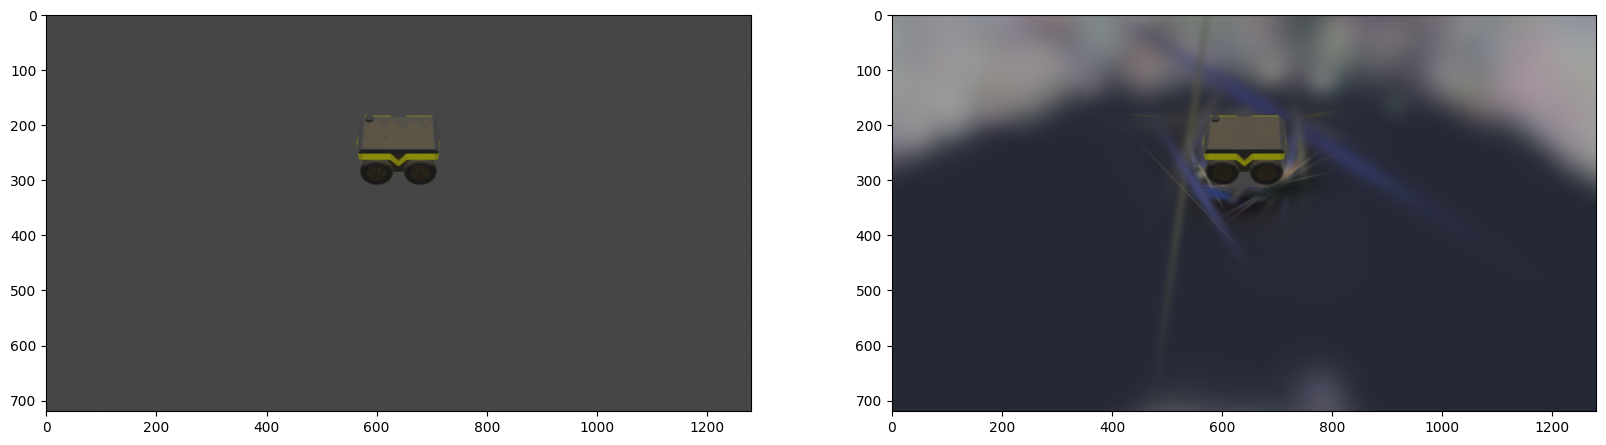

In [41]:
print(gt_rgb.shape)
print(predicted_rgb.shape)

#Plot gt_rgb and predicted_rgb with matplotlib
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gt_rgb.cpu().numpy())
plt.subplot(1, 2, 2)
plt.imshow(predicted_rgb.detach().cpu().numpy())
plt.show()